<a href="https://colab.research.google.com/github/Chocoding1/Machine_Learning_Deep_Learning/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/machine_learning/classification

/content/drive/MyDrive/machine_learning/classification


In [35]:
# Basic setting
import os
import pickle
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Decision Tree 분류 모델

## [P.1] 결정 트리 학습

iris 붓꽃 데이터를 결정 트리로 학습해볼 것임     
사이킷런에서 제공하는 [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)를 이용해 모델 선언

In [49]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data[:, 2:] # petal length and width
y = iris.target

In [50]:
def plot_dataset(X, y, show=True):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "s") # label 0
    # 동일한 표현 => plt.scatter(X[y==0, 0], X[y==0, 1]) # label 0
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "^") # label 1
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "o") # label 2

    if show:
        plt.show()

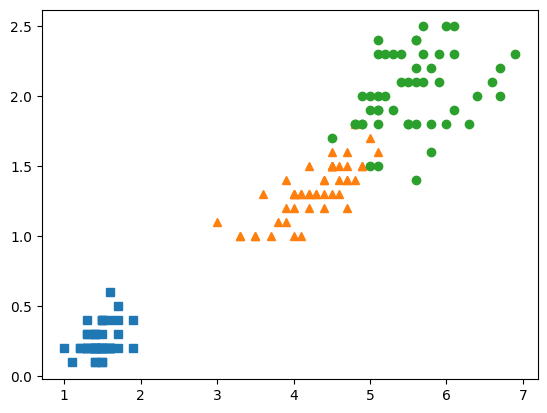

In [51]:
plot_dataset(X, y)

In [58]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=3)

결정 트리의 학습, 즉 노드를 늘려가는 작업을 멈춰주는 argument는 다음과 같음

* __max_depth__: depth의 최대 크기
* __min_samples_split__: 한 노드에 존재해야되는 최소의 샘플 수로, 이 수보다 적게 존재하면 결정 트리의 split을 멈춤
* __min_samples_leaf__: leaf 노드가 되기 위해서 필요한 최소의 샘플 수
* __max_leaf_nodes__: leaf 노드의 최대수 설정

In [59]:
def plot_decision_boundary(clf, axes=None):
    if axes is None:
        x0 = np.linspace(0, 8, 100)
        x1 = np.linspace(0, 3, 100)
    else:
        x0 = np.linspace(axes[0][0], axes[0][1], 100)
        x1 = np.linspace(axes[1][0], axes[1][1], 100)


    x0, x1 = np.meshgrid(x0, x1)
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_pred = clf.predict(X_new).reshape(x0.shape)

    plt.contourf(x0, x1, y_pred, alpha=0.25)
    plt.show()

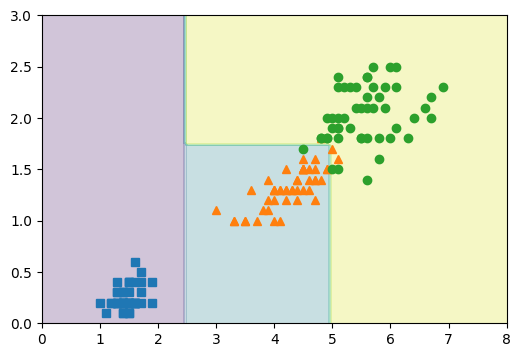

In [60]:
plt.figure(figsize=(6, 4))

plot_dataset(X, y, False)
plot_decision_boundary(tree_clf)

plt.show()

depth는 결정 트리의 split 수를 결정해주는 요소임    
따라서 `max_depth=3`으로 설정했을 때, 위의 그림처럼 세개의 선이 융합되어 결정 경계가 생성됨

## [P.2] 결정 트리 정확도 계산

데이터에 대한 성능은 [`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)를 통해 계산이 가능함     
`y_pred`의 argument는 결정 트리 클래스의 `predict` 함수를 통해 예측 확률이 가장 높은 클래스를 얻으면 됨     

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [73]:
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train, y_train)

y_pred = tree_clf.predict(X_test)

In [74]:
y_pred

array([2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 2, 1, 2, 0, 1, 2, 0, 1, 0, 2, 2, 2,
       2, 1, 2, 1, 0, 1, 2, 2])

In [75]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9666666666666667

각 샘플에 대한 클래스 확률을 보려면, `DecisionTreeClassifier` 클래스의 `predict_proba` 메서드 사용하면 됨

In [78]:
index = 0
tree_clf.predict_proba(X_test[index].reshape(-1, 2))

array([[0., 0., 1.]])

세 번째 인덱스만 1인 거로 보아, X_test의 첫 번째 샘플은 class가 2라는 것을 알 수 있다.

In [80]:
# 실제 class 확인
y_test # 첫 번째 인덱스가 2인 것을 확인할 수 있다.

array([2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 2, 1, 2, 0, 1, 2, 0, 1, 0, 2, 2, 2,
       2, 1, 2, 1, 0, 1, 2, 1])

In [81]:
# 테스트 셋 전체 예상 클래스 확인
tree_clf.predict_proba(X_test[:])

array([[0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.25, 0.75],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ]])

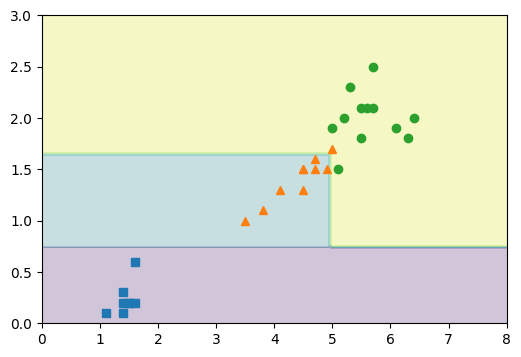

In [82]:
plt.figure(figsize=(6, 4))

plot_dataset(X_test, y_test, False)
plot_decision_boundary(tree_clf)

plt.show()

## [P.3] 결정 트리의 하이퍼파라미터 조절

`max_depth` argument를 조절해가며, 결정 트리가 데이터셋을 어떻게 학습하는지 분석

In [107]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.1, random_state=53)

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [109]:
tree_clf = DecisionTreeClassifier(max_depth=100, random_state=42)
tree_clf.fit(X_train, y_train)

y_pred = tree_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.985

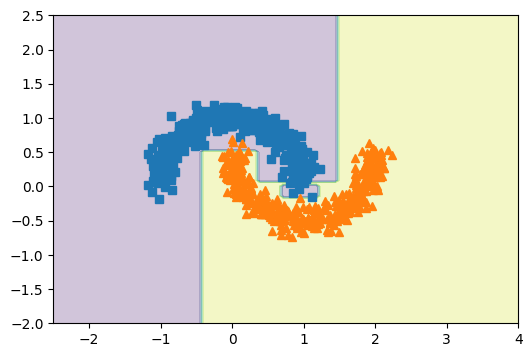

In [110]:
plt.figure(figsize=(6, 4))

plot_dataset(X_train, y_train, False)
plot_decision_boundary(tree_clf, axes=[[-2.5,4], [-2, 2.5]])

plt.show()

split의 수가 너무 많으면, 학습 데이터셋에 오버피팅 되는 경향이 생기고 결국 평가 데이터셋에 대한 성능은 하락함     
하지만, iris나 moons는 간단한 데이터이기 때문에 오히려 학습 데이터셋에 오버피팅 됐을 때 더 좋은 성능을 보여주기도 함